In [74]:
from os import path, system, listdir
import pandas as pd
import abacat as ab

In [112]:
df = pd.read_csv("pgl_data/vibrio_corallilyticus_metadata.csv", sep="\t")
df_ = pd.read_csv("pgl_data/vibrio_corallilyticus_genome_annotation_report.csv")

In [113]:
df_.rename(columns={"BioSample":"biosample"}, inplace=True)

In [114]:
df_["biosample"] = df_["biosample"].str.strip()

In [115]:
df = df.drop_duplicates(subset="assembly_accession")

In [116]:
df = df.merge(df_, on="biosample")

In [117]:
df["local_fna_filename"] = df["local_filename"].str.replace(
    ".gbff", ".fna").str.replace("./refseq", "/home/vini/Bio/complex_networks/pgl_data/refseq")

In [118]:
df["local_fna_filename"] = df["local_fna_filename"].str.replace(".gz", "")

In [119]:
for i in df["local_fna_filename"]:
    if not path.isfile(i):
        print(i)
   # else:
   #     system(f"gunzip {i}")

In [120]:
df["new_name"] = "Vibrio coralliilyticus " + df["Strain"]
df["new_name"] = df["new_name"].str.replace(" ", "_")

2019-12-13 05:35:07 - Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2019-12-13 05:35:07 - NumExpr defaulting to 8 threads.


In [121]:
df.loc[7, "new_name"] = "Vibrio_coralliilyticus_RE22A"
df.loc[14, "new_name"] = "Vibrio_coralliilyticus_RE22B"

In [122]:
df["new_name"]

0     Vibrio_coralliilyticus_ATCC_BAA-450
1               Vibrio_coralliilyticus_P1
2           Vibrio_coralliilyticus_OCN008
3           Vibrio_coralliilyticus_OCN014
4             Vibrio_coralliilyticus_RE98
5            Vibrio_coralliilyticus_S2052
6            Vibrio_coralliilyticus_S2043
7            Vibrio_coralliilyticus_RE22A
8               Vibrio_coralliilyticus_58
9          Vibrio_coralliilyticus_SNUTY-1
10         Vibrio_coralliilyticus_080116A
11            Vibrio_coralliilyticus_RE87
12           Vibrio_coralliilyticus_AIC-7
13          Vibrio_coralliilyticus_NA0301
14           Vibrio_coralliilyticus_RE22B
Name: new_name, dtype: object

In [139]:
df[["new_name", "local_fna_filename"]].to_csv("pgl_data/vibrio_pgl_input.tsv", index=False, header=None, sep="\t")

In [99]:
# dir_ = "/home/vini/Bio/complex_networks/pgl_data/refseq/bacteria/prokka"
# dst_base = "/home/vini/Bio/complex_networks/pgl_data/refseq/bacteria"

# for dir__ in listdir(dir_):
#     name = dir__.split("_genomic")[0]
#     for file in listdir(path.join(dir_, dir__)):
#         file = path.join(dir_, dir__, file)
#         ext = path.splitext(file)[1]
#         dst = path.join(dst_base, name[:15], name + "_prokka" + ext)
#         system(f"mv {file} {dst}")

In [123]:
df["prokka_gff"] = df["local_fna_filename"].apply(lambda s: s.replace("_genomic.fna", "_prokka.gff"))

In [124]:
df.columns

Index(['assembly_accession', 'bioproject', 'biosample', 'wgs_master',
       'excluded_from_refseq', 'refseq_category', 'relation_to_type_material',
       'taxid', 'species_taxid', 'organism_name', 'infraspecific_name',
       'isolate', 'version_status', 'assembly_level', 'release_type',
       'genome_rep', 'seq_rel_date', 'asm_name', 'submitter',
       'gbrs_paired_asm', 'paired_asm_comp', 'ftp_path', 'local_filename',
       '#Organism/Name', 'Strain', 'BioProject', 'Group', 'SubGroup',
       'Assembly', 'Size (Mb)', 'GC%', 'Replicons', 'WGS', 'Scaffolds',
       'Genes', 'Proteins', 'Release Date', 'Modify Date', 'Level',
       'RefSeq FTP', 'GenBank FTP', 'local_fna_filename', 'new_name',
       'prokka_gff'],
      dtype='object')

In [129]:
df[["new_name","prokka_gff"]].to_csv("pgl_data/vibrio_pgl_prokka.csv", sep="\t", index=False, header=None)


In [31]:
import networkx as nx

In [33]:
!pwd

/home/vini/Bio/complex_networks


In [36]:
!ls

Network Analysis.ipynb	listas	  pgl_draft.ipynb  relatorio
data			pgl_data  plots		   vibrio_c_default


In [139]:
g = nx.read_gexf("vibrio_pgl_prokka/pangenomeGraph.gexf")

In [150]:
def func(graph):
    return pd.DataFrame.from_dict(dict(graph.nodes(data=True)), orient='index')

In [151]:
ndf = func(g)

In [236]:
ndf["degree"] = [g.degree()[x] for x in ndf.index]

In [243]:
ndf[ndf["partition"] == "shell")]

(365, 29)

In [161]:
ndf["product"].value_counts()

hypothetical protein                                                        7311
HTH-type transcriptional regulator DmlR                                       43
Sensor histidine kinase RcsC                                                  37
Adaptive-response sensory-kinase SasA                                         27
putative protein                                                              23
                                                                            ... 
Cob(I)yrinic acid a%2Cc-diamide adenosyltransferase                            1
30S ribosomal protein S20                                                      1
Nucleoid occlusion factor SlmA                                                 1
6-phosphogluconate dehydrogenase%2C NADP(+)-dependent%2C decarboxylating       1
30S ribosomal protein S3                                                       1
Name: product, Length: 2572, dtype: int64

In [254]:
ndf[ndf["product"].apply(
    lambda s: "drug" in s or "vir" in s.lower())]["partition"].value_counts()

persistent    41
cloud         41
shell          4
Name: partition, dtype: int64

In [246]:
ndf[
    (ndf["partition"] == "shell") &
    (ndf["product"] != "hypothetical protein")
]

,nb_genes,name,product,type,partition,subpartition,partition_exact,partition_soft,length_avg,length_med,...,viz,label,Vibrio_coralliilyticus_OCN014,Vibrio_coralliilyticus_080116A,Vibrio_coralliilyticus_RE98,Vibrio_coralliilyticus_NA0301,Vibrio_coralliilyticus_58,Vibrio_coralliilyticus_RE87,Vibrio_coralliilyticus_P1,degree
432,9,dltA_1,D-alanine--poly(phosphoribitol) ligase subunit 1,CDS,shell,S1,exact_accessory,soft_accessory,11710.67,11975,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",ACOGLMFH_00636,AADFBFMN_04620,NaN,NaN,PNJLNNEM_01823,NaN,ACOGLMFH_00636,AHGDBNMD_02329,4
697,5,ompA_1,Outer membrane protein A,CDS,shell,S1,exact_accessory,soft_accessory,590.00,590,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",CPFIEJMN_02738,NaN,PFGAHHNN_01310,HCPBJEEI_04482,PNJLNNEM_02760,NaN,ACOGLMFH_04830,NaN,2
881,10,mdtH_2,Multidrug resistance protein MdtH,CDS,shell,S1,exact_accessory,soft_accessory,1244.00,1244,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",AHGDBNMD_00124,AADFBFMN_01085|AADFBFMN_05040,PFGAHHNN_01653,NaN,PNJLNNEM_03849,NaN,ACOGLMFH_02478,AHGDBNMD_00124,3
939,7,srrA,Transcriptional regulatory protein SrrA,CDS,shell,S1,exact_accessory,soft_accessory,752.00,752,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",CPFIEJMN_01553,AADFBFMN_04129,PFGAHHNN_00228,HCPBJEEI_03935,PNJLNNEM_01352,NaN,NaN,NaN,2
1329,11,yidK,putative symporter YidK,CDS,shell,S1,exact_accessory,soft_accessory,1768.73,1769,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",ACOGLMFH_02004,AADFBFMN_05288,PFGAHHNN_02167,HCPBJEEI_05249,PNJLNNEM_04058,NaN,ACOGLMFH_02004|ACOGLMFH_03102,AHGDBNMD_01820,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12181,8,oppD_4,Oligopeptide transport ATP-binding protein OppD,CDS,shell,S1,exact_accessory,soft_accessory,761.00,761,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",CPFIEJMN_02603,AADFBFMN_03517,PFGAHHNN_01188,HCPBJEEI_04605,PNJLNNEM_02883,NaN,ACOGLMFH_04708,NaN,3
12293,8,dmlR_20,HTH-type transcriptional regulator DmlR,CDS,shell,S1,exact_accessory,soft_accessory,896.00,896,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",AADFBFMN_04970,AADFBFMN_04970,PFGAHHNN_01052,HCPBJEEI_04842,NaN,NaN,ACOGLMFH_05090,NaN,3
12315,7,nrdF2,Ribonucleoside-diphosphate reductase subunit b...,CDS,shell,S1,exact_accessory,soft_accessory,967.57,974,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",NFFLFIEF_02360,AADFBFMN_04350,PFGAHHNN_00443,NaN,NaN,NaN,ACOGLMFH_00372,NaN,2
12316,7,sufB,FeS cluster assembly protein SufB,CDS,shell,S1,exact_accessory,soft_accessory,1463.00,1463,...,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",NFFLFIEF_02365,AADFBFMN_04345,PFGAHHNN_00438,NaN,NaN,NaN,ACOGLMFH_00367,NaN,2


In [178]:
ndf.iloc[ndf[ndf["partition"] == "cloud"]["nb_genes"].nlargest(10).index]

,nb_genes,name,product,type,partition,subpartition,partition_exact,partition_soft,length_avg,length_med,...,Vibrio_coralliilyticus_S2043,viz,label,Vibrio_coralliilyticus_OCN014,Vibrio_coralliilyticus_080116A,Vibrio_coralliilyticus_RE98,Vibrio_coralliilyticus_NA0301,Vibrio_coralliilyticus_58,Vibrio_coralliilyticus_RE87,Vibrio_coralliilyticus_P1
3177,11,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,152.00,152,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",AHGDBNMD_04325,NaN,NaN,HCPBJEEI_04148,PNJLNNEM_04030|PNJLNNEM_04705|PNJLNNEM_02405,FLLLBHKB_03396|FLLLBHKB_00292,ACOGLMFH_02275,AHGDBNMD_04325
3178,11,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,215.00,215,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",AHGDBNMD_04326,NaN,NaN,HCPBJEEI_04147,PNJLNNEM_04706|PNJLNNEM_02404|PNJLNNEM_04029,FLLLBHKB_00291|FLLLBHKB_03395,ACOGLMFH_02274,AHGDBNMD_04326
5133,11,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,482.00,482,...,GIHCKAFH_00200|GIHCKAFH_00164,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",FKIKDOPA_04975,NaN,NaN,NaN,PNJLNNEM_04369,FLLLBHKB_00536|FLLLBHKB_00515,NaN,NaN
8722,11,,IS200/IS605 family transposase ISSham1,CDS,cloud,C,exact_accessory,soft_accessory,446.00,446,...,GIHCKAFH_04830,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",CPFIEJMN_00957,NaN,NaN,HCPBJEEI_02816,NaN,NaN,NaN,NaN
12013,10,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,422.90,428,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",FLLLBHKB_00295,NaN,NaN,HCPBJEEI_04151,PNJLNNEM_04702|PNJLNNEM_04033|PNJLNNEM_02408,FLLLBHKB_00295|FLLLBHKB_03400,ACOGLMFH_02278,AHGDBNMD_04321
2669,9,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,383.00,383,...,GIHCKAFH_01936|GIHCKAFH_01946,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",AHGDBNMD_04014,AADFBFMN_05101,NaN,NaN,PNJLNNEM_03893,NaN,NaN,AHGDBNMD_04014
311,8,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,497.38,509,...,GIHCKAFH_01942,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",FKIKDOPA_03417,AADFBFMN_01782|AADFBFMN_05095,PFGAHHNN_01580,NaN,PNJLNNEM_04380|PNJLNNEM_03897,NaN,NaN,NaN
4407,8,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,1343.38,1355,...,GIHCKAFH_04194,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",AHGDBNMD_01864,NaN,NaN,NaN,PNJLNNEM_03563,FLLLBHKB_00776,NaN,AHGDBNMD_01864
4453,8,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,473.75,488,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",AHGDBNMD_03994,NaN,NaN,NaN,PNJLNNEM_04699|PNJLNNEM_01752,NaN,NaN,AHGDBNMD_03994
6559,8,,hypothetical protein,CDS,cloud,C,exact_accessory,soft_accessory,107.00,107,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",NFFLFIEF_01581,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
len(g.nodes), len(g.edges())

(12323, 14981)

In [185]:
ndf[ndf["partition"] == "shell"]

,nb_genes,name,product,type,partition,subpartition,partition_exact,partition_soft,length_avg,length_med,...,Vibrio_coralliilyticus_S2043,viz,label,Vibrio_coralliilyticus_OCN014,Vibrio_coralliilyticus_080116A,Vibrio_coralliilyticus_RE98,Vibrio_coralliilyticus_NA0301,Vibrio_coralliilyticus_58,Vibrio_coralliilyticus_RE87,Vibrio_coralliilyticus_P1
1,8,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,1070.00,1070,...,NaN,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",IJBHHNBA_04692,AADFBFMN_02778,PFGAHHNN_03858,HCPBJEEI_02894,PNJLNNEM_04355,NaN,NaN,NaN
268,7,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,4495.57,4493,...,NaN,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",ACOGLMFH_01911,AADFBFMN_00153,PFGAHHNN_02254,HCPBJEEI_02717,NaN,NaN,ACOGLMFH_01911,NaN
271,9,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,14698.67,14957,...,GIHCKAFH_02851,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",ACOGLMFH_01987,AADFBFMN_05144,NaN,HCPBJEEI_05147,PNJLNNEM_00428,NaN,ACOGLMFH_01987,AHGDBNMD_01834
304,10,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,2346.50,2333,...,GIHCKAFH_01916,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",FKIKDOPA_03399,AADFBFMN_05122,NaN,HCPBJEEI_05135,NaN,NaN,ACOGLMFH_03340,AHGDBNMD_01347
307,8,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,344.00,350,...,GIHCKAFH_01929,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",FKIKDOPA_03410,AADFBFMN_05105,PFGAHHNN_01572,NaN,PNJLNNEM_03905,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,7,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,800.00,800,...,NaN,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",AADFBFMN_04971,AADFBFMN_04971,PFGAHHNN_01053,HCPBJEEI_04841,NaN,NaN,ACOGLMFH_05091,NaN
12304,7,,hypothetical protein,CDS,shell,S1,exact_accessory,soft_accessory,308.00,314,...,NaN,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",AADFBFMN_05048,AADFBFMN_05048,NaN,HCPBJEEI_05075,PNJLNNEM_03863,NaN,ACOGLMFH_02491,NaN
12315,7,nrdF2,Ribonucleoside-diphosphate reductase subunit b...,CDS,shell,S1,exact_accessory,soft_accessory,967.57,974,...,GIHCKAFH_03841,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",NFFLFIEF_02360,AADFBFMN_04350,PFGAHHNN_00443,NaN,NaN,NaN,ACOGLMFH_00372,NaN
12316,7,sufB,FeS cluster assembly protein SufB,CDS,shell,S1,exact_accessory,soft_accessory,1463.00,1463,...,GIHCKAFH_03846,"{'color': {'r': 0, 'g': 216, 'b': 96, 'a': 0.0...",NFFLFIEF_02365,AADFBFMN_04345,PFGAHHNN_00438,NaN,NaN,NaN,ACOGLMFH_00367,NaN


In [210]:
ndf[ndf["product"].apply(lambda s: "vir" in s.lower())]

,nb_genes,name,product,type,partition,subpartition,partition_exact,partition_soft,length_avg,length_med,...,Vibrio_coralliilyticus_S2043,viz,label,Vibrio_coralliilyticus_OCN014,Vibrio_coralliilyticus_080116A,Vibrio_coralliilyticus_RE98,Vibrio_coralliilyticus_NA0301,Vibrio_coralliilyticus_58,Vibrio_coralliilyticus_RE87,Vibrio_coralliilyticus_P1
627,14,,Virulence protein,CDS,persistent,P,exact_accessory,soft_accessory,368.0,368,...,GIHCKAFH_03480,"{'color': {'r': 247, 'g': 165, 'b': 7, 'a': 0....",CPFIEJMN_02142,AADFBFMN_04747,PFGAHHNN_00829,HCPBJEEI_03289,PNJLNNEM_01949,FLLLBHKB_04356,ACOGLMFH_00761,NaN
2241,1,phoQ,Virulence sensor histidine kinase PhoQ,CDS,cloud,C,exact_accessory,soft_accessory,722.0,722,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",KFHGEANF_02299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,15,cvfB,Conserved virulence factor B,CDS,persistent,P,exact_core,soft_core,836.0,836,...,GIHCKAFH_03310,"{'color': {'r': 247, 'g': 165, 'b': 7, 'a': 0....",CPFIEJMN_00476,AADFBFMN_01561,PFGAHHNN_02325,HCPBJEEI_01374,PNJLNNEM_04665,FLLLBHKB_00339,ACOGLMFH_02638,AHGDBNMD_02140
8214,1,virS,HTH-type transcriptional regulator VirS,CDS,cloud,C,exact_accessory,soft_accessory,374.0,374,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",FKIKDOPA_00615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10379,15,virB,Virulence regulon transcriptional activator VirB,CDS,persistent,P,exact_core,soft_core,1082.0,1082,...,GIHCKAFH_04465,"{'color': {'r': 247, 'g': 165, 'b': 7, 'a': 0....",AHGDBNMD_04192,AADFBFMN_05336,PFGAHHNN_02108,HCPBJEEI_05004,PNJLNNEM_04107,FLLLBHKB_05076,ACOGLMFH_03054,AHGDBNMD_04192
10565,2,virB_1,Virulence regulon transcriptional activator VirB,CDS,cloud,C,exact_accessory,soft_accessory,1127.0,1127,...,NaN,"{'color': {'r': 121, 'g': 222, 'b': 255, 'a': ...",NMLJHHJO_03187,NaN,NaN,HCPBJEEI_05495,NaN,NaN,NaN,NaN
10791,15,bvgA,Virulence factors putative positive transcript...,CDS,persistent,P,exact_core,soft_core,614.0,614,...,GIHCKAFH_00836,"{'color': {'r': 247, 'g': 165, 'b': 7, 'a': 0....",AHGDBNMD_04225,AADFBFMN_04143,PFGAHHNN_00242,HCPBJEEI_03921,PNJLNNEM_01366,FLLLBHKB_04962,ACOGLMFH_00161,AHGDBNMD_04225


In [211]:
import sys
import re

In [220]:
def grep(term, file):
    with open(file) as f:
        r = f.readlines()
        if term in r:
            print(term)

In [221]:
df["prokka_ffn"] = df["prokka_gff"].str.replace(".gff", ".ffn")

In [222]:
for i in df["prokka_ffn"]:
    grep("AHGDBNMD_04225", i)

In [165]:
ndf[ndf["product"].apply(
    lambda s: s in ("hypothetical protein", "putative protein"))
   ]["partition"].value_counts()

cloud         5314
persistent    1789
shell          231
Name: partition, dtype: int64

In [53]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [132]:
G = g

In [134]:
import collections

In [352]:
def plot(data, dataset, filename):
    # Adapted from 
    # https://gist.github.com/yamaguchiyuto/504eb5482fc73f046f6b
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    """ Plot Distribution """
    ax1.plot(range(len(data)),data,'go')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Freq')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_distribution.png', dpi=500)
    plt.clf()

    """ Plot CDF """
    s = float(data.sum())
    cdf = data.cumsum(0)/s
    ax2.plot(range(len(cdf)),cdf,'go')
    plt.xscale('log')
    plt.ylim([0,1])
    plt.ylabel('CDF')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_cdf.png', dpi=500)
    plt.clf()

    """ Plot CCDF """
    ccdf = 1-cdf
    plt.plot(range(len(ccdf)),ccdf,'go')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([0,1])
    plt.ylabel('CCDF')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_ccdf.png', dpi=500)
    plt.clf()

In [353]:
M = nx.to_scipy_sparse_matrix(g)
indegrees = np.array([int(i) for i in M.sum(0).A[0]])
outdegrees = np.array([int(i) for i in M.sum(1).T.A[0]])
indegree_distribution = np.bincount(indegrees)
outdegree_distribution = np.bincount(outdegrees)
plot(indegree_distribution, "Vibrio c", "distributions")

/home/vini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


<Figure size 432x288 with 0 Axes>

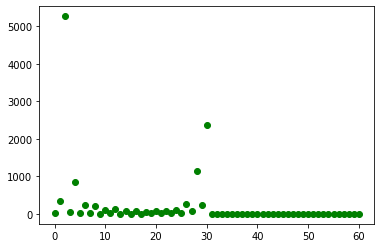

In [65]:
plt.plot(range(len(indegree_distribution)),indegree_distribution,'go')

In [60]:
np.array([int(i) for i in indegrees])

array([28, 28, 28, ...,  2,  2,  1])

Métricas

* Grau médio
* Grau médio ponderado
* Diâmetro da GCC
* APD

In [268]:
# Criando um vetor contendo o tamanho das componentes conexas
cc = pd.Series([len(i) for i in nx.connected_components(g)])

In [269]:
largest_cc = max(nx.connected_components(g), key=len)
cc = g.subgraph(largest_cc).copy()

In [298]:
g.number_of_nodes()

12323

In [299]:
cc.number_of_nodes()

11613

In [309]:
d = ndf["degree"].describe()
d = d.apply(lambda row: round(row, 2))

In [304]:
nx.diameter(cc) # 286

286

In [311]:
apd = nx.average_shortest_path_length(cc)

In [328]:
clust = nx.average_clustering(g)

In [329]:
clust

0.049525891131727104

In [336]:
print("\n".join([
    f"Núm. vértices GCC/total: {cc.number_of_nodes()}/{g.number_of_nodes()}",
    f"Núm. arestas GCC/total: {cc.number_of_edges()}/{g.number_of_edges()}",
    f"Grau médio: {d['mean']}",
    f"Grau máximo: {int(d['max'])}",
    f"Diâmetro da GCC: 286",
    f"Média dos caminhos mínimos na GCC: {round(apd, 2)}",
    f"Média de clustering: {round(clust, 2)}"
]))

Núm. vértices GCC/total: 11613/12323
Núm. arestas GCC/total: 14304/14981
Grau médio: 2.43
Grau máximo: 38
Diâmetro da GCC: 286
Média dos caminhos mínimos na GCC: 56.68
Média de clustering: 0.05


In [338]:
ecc = nx.eccentricity(cc)

In [350]:
sns.set_style("darkgrid")

In [358]:
plt.subplot?

[]

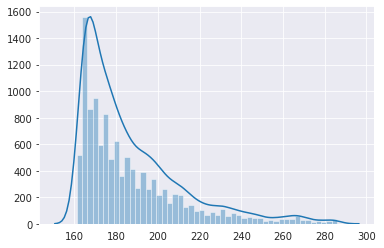

In [364]:
# Plotting hist without kde
ax = sns.distplot(my_series, kde=False)

# Creating another Y axis
second_ax = ax.twinx()

#Plotting kde without hist on the second Y axis
sns.distplot(my_series, ax=second_ax, kde=True, hist=False)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

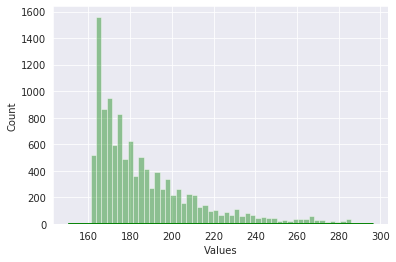

In [362]:
ax1 = plt.subplot()
my_series = [v for k, v in ecc.items()]
sns.distplot(my_series, ax=ax1, rug=False, kde=True, hist=False, color="g")
sns.distplot(my_series, ax=ax1, rug=False, kde=False, hist=True, norm_hist=False, color="g")
plt.xlabel("Values")
plt.ylabel("Count")
plt.savefig("eccentricity")